In [22]:
import pandas as pd
import nltk 

In [23]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [24]:
names = ["ID", "App", "Sentiment", "Comment"]
data = pd.read_csv("twitter_training.csv", names=names)
data.sample(3)

,ID,App,Sentiment,Comment
28868,566,ApexLegends,Negative,"@ PlayApex Xbox Rating sucks it up literally too easily to make it out of gold, then when they get a high rank, they can't handle it and suck it up and because of the level of protection they keep getting on my team LOL HELPPPP"
38395,5384,Hearthstone,Positive,"I don't know what happens, but this trailer is amazing."
34217,6675,Fortnite,Irrelevant,@roundedtiktak like you.


In [25]:
print(data.shape)

(74682, 4)


In [26]:
# data.iloc[:, 1].value_counts().plot.bar()

<AxesSubplot:>

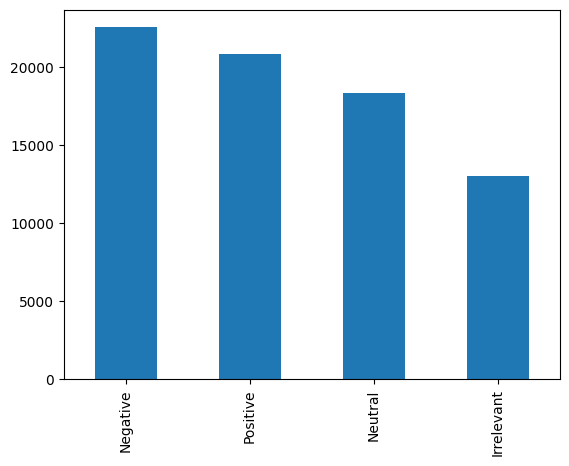

In [27]:
data.Sentiment.value_counts().plot.bar()

In [28]:
from keras.preprocessing.text import Tokenizer

In [29]:
N = 10000
texts = data.values[:, 3].astype(str)[:N]
y = data.values[:N, 2]
print(texts[0], y[0])

im getting on borderlands and i will murder you all , Positive


In [30]:
t = Tokenizer()
t.fit_on_texts(texts=texts)

In [31]:
X = t.texts_to_matrix(texts)

In [32]:
X.shape

(10000, 9340)

In [33]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [34]:
from sklearn.neighbors import KNeighborsClassifier as KNC 

In [35]:
knc = KNC(n_neighbors=3)
knc.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [36]:
y_pred = knc.predict(x_test)
# y_pred

In [37]:
from sklearn.metrics import accuracy_score

In [38]:
accuracy_score(y_pred=y_pred, y_true=y_test)

0.8748

In [39]:
def rating_sentiment(text):
    score = ''
    wordvec = t.texts_to_matrix(text)
    score = knc.predict(wordvec)
    return score

In [40]:
def run():
    txt = input()
    print(txt)
    return rating_sentiment([txt])[0]

In [41]:
run()

i don't like it


'Negative'